# Model Comparison

Jupyter Notebook referenced from my website:
[Software Nirvana: Model Selection (1b)](https://sdiehl28.netlify.com/2018/03/model-selection-1b)

### Goals
Discuss how to chose the "best" model between two models based on their Cross Validated Scores.

Most of this discussion is on the blog post at the above link.

### Common Imports and Notebook Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline
sns.set() # enable seaborn style

In [2]:
# read in all the labeled data
all_data = pd.read_csv('../data/train.csv')

# break up the dataframe into X and y
X = all_data.drop('Survived', axis=1)
y = all_data['Survived']

# As before, remove all non-numeric fields and PassengerId
drop_fields = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'PassengerId']
X = X.drop(drop_fields, axis=1)

# Remove all columns with null values (1st iteration only)
X.dropna(axis=1, inplace=True)
X.dtypes

Pclass      int64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [3]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.dummy import DummyClassifier

k_folds = 10
random_seed=5
crossvalidation = KFold(n_splits=k_folds, shuffle=True, 
                        random_state=random_seed)

null_model = DummyClassifier(strategy='most_frequent',random_state=0)

null_model_scores = cross_val_score(null_model, X, y, cv=crossvalidation, 
                         scoring='accuracy', n_jobs=-1)

print('Scores: \n', np.round(null_model_scores, 3))
print(f'Cross Validated Accuracy: {null_model_scores.mean():.3f}')

Scores: 
 [0.6   0.64  0.629 0.674 0.551 0.607 0.607 0.596 0.64  0.618]
Cross Validated Accuracy: 0.616


In [5]:
from sklearn.linear_model import LogisticRegression
base_model = LogisticRegression()

k_folds = 10
random_seed=5
crossvalidation = KFold(n_splits=k_folds, shuffle=True, 
                        random_state=random_seed)

# compute cross validated scores for each of the K=5 folds
scores = cross_val_score(base_model, X, y, cv=crossvalidation, 
                         scoring='accuracy', n_jobs=-1)

# save iteration 1 results for comparison with future iterations
np.save("../data/iter01.data", scores)

# print results
print('Scores: \n', np.round(scores, 3))
print(f'Cross Validated Accuracy: {scores.mean():.3f}')

Scores: 
 [0.689 0.764 0.697 0.73  0.629 0.64  0.652 0.697 0.708 0.652]
Cross Validated Accuracy: 0.686


In [6]:
diff_scores = scores - null_model_scores
print(f'CV Diff Scores: \n{np.round(diff_scores,3)}')
print(f'Mean diff: {diff_scores.mean():.3f}')

CV Diff Scores: 
[0.089 0.124 0.067 0.056 0.079 0.034 0.045 0.101 0.067 0.034]
Mean diff: 0.070


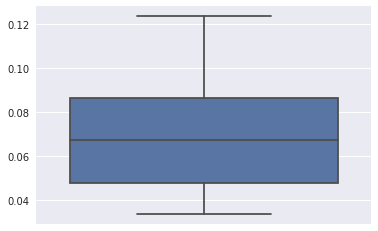

In [7]:
sns.boxplot(y=diff_scores)

We see that every CV score was better for our simple Logistic Regression model than it was for the null model, so we decide that it is the better model.

### Summary

Most of the discussion was presented in the [blog post](https://sdiehl28.netlify.com/2018/03/model-selection-1b)

For model comparison, we will compute the cross validated scores an the same train/test